#### Imports and setup

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers, optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

Using TensorFlow backend.


In [2]:
fl = pd.read_pickle("fl_features_1.p")

In [3]:
ca = pd.read_pickle("ca_features_1.p")

In [4]:
zips = pd.read_csv('SLO_zips.csv')

In [5]:
zips = list(zips['Zip Code'])

In [6]:
features = ['HT_bi_0_count', 'HT_bi_1_count', 'HT_bi_2_count',
       'HT_tri_0_count', 'HT_tri_1_count',
       'HT_tri_2_count', 'HT_uni_0_count', 'HT_uni_1_count', 'HT_uni_2_count',
       'sex_bi_0_count', 'sex_bi_1_count',
       'sex_bi_2_count',  'sex_tri_0_count',
       'sex_tri_1_count', 'sex_tri_2_count', 'sex_uni_0_count',
       'sex_uni_1_count', 'sex_uni_2_count', 'yelp', 'rubmaps', 'cluster']

In [7]:
def convert_to_binary(y_pred):
    test = list()
    new_pred = y_pred >= 0.5
    for i in range(len(new_pred)):
        test.append(new_pred[i][0])
    return test

#### Model #1: standardizing datasets individually

In [71]:
# convert pandas dataframe to numpy array
X = fl2[features].values
y = fl2[["prob"]].values

In [72]:
# standardize
sc = MinMaxScaler()
X = sc.fit_transform(X)
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [74]:
# setup and run model
model = Sequential()
model.add(Dense(10))
model.add(Dense(1, activation="sigmoid"))
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='mse', optimizer=opt, metrics=['mse'])
model.fit(X_train, y_train, epochs=7, batch_size=100)

Epoch 1/7
30972/30972 [==============================] - 3s 90us/step - loss: 0.1713 - mse: 0.1713
Epoch 2/7
30972/30972 [==============================] - 2s 77us/step - loss: 0.1453 - mse: 0.1453
Epoch 3/7
30972/30972 [==============================] - 3s 93us/step - loss: 0.1204 - mse: 0.1204: 2s - loss: 0.1284 - - ETA: 1s - loss:
Epoch 4/7
30972/30972 [==============================] - 3s 84us/step - loss: 0.0974 - mse: 0.0974
Epoch 5/7
30972/30972 [==============================] - 3s 86us/step - loss: 0.0773 - mse: 0.0773
Epoch 6/7
30972/30972 [==============================] - 2s 70us/step - loss: 0.0607 - mse: 0.0607
Epoch 7/7
30972/30972 [==============================] - 2s 79us/step - loss: 0.0479 - mse: 0.0479: 1s - loss: 0.0549 - mse: - 


In [88]:
y_pred = model.predict(X_test)
pred = convert_to_binary(y_pred)
test = convert_to_binary(y_test)

In [90]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('accuracy =', a*100)

accuracy = 99.44794188861985


In [91]:
# use model to predict california
X = ca[features].values
sc = MinMaxScaler()
X = sc.fit_transform(X)

y_pred = model.predict(X)
pred=convert_to_binary(y_pred)

In [79]:
ca['pred']=pred

In [81]:
ca[ca['pred']==0].describe()

,lat,lon,yelp,rubmaps,HT_total_lexicon_score,sex_total_lexicon_score,HT_bi_0_count,HT_bi_1_count,HT_bi_2_count,HT_tri_0_count,...,sex_tri_2_count,sex_uni_0_count,sex_uni_1_count,sex_uni_2_count,bi_count,tri_count,sex_bi_score,sex_tri_score,HT_bi_score,HT_tri_score
count,55163.000000,55275.000000,55283.0,55283.0,55283.000000,55283.000000,55283.000000,55283.000000,55283.000000,55283.000000,...,55283.000000,55283.000000,55283.000000,55283.000000,55283.000000,55283.000000,55283.000000,55283.000000,55283.000000,55283.0
mean,35.359167,-119.424739,1.0,0.0,0.378706,0.726263,0.006114,0.000072,0.000018,0.000778,...,0.000018,0.740933,0.595156,0.065554,0.007652,0.000796,0.002731,0.000036,0.001954,0.0
std,2.076006,2.018919,0.0,0.0,4.365939,1.724455,0.091213,0.013449,0.004253,0.061482,...,0.004253,1.285033,1.438010,0.455192,0.103986,0.061628,0.071243,0.008506,0.212392,0.0
min,30.527960,-124.264400,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,33.837950,-121.834850,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,34.149380,-118.407500,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,37.656915,-117.873500,1.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,41.800260,-99.852900,1.0,0.0,330.000000,60.000000,5.000000,3.000000,1.000000,13.000000,...,1.000000,30.000000,32.000000,30.000000,5.000000,13.000000,6.000000,2.000000,44.000000,0.0


In [82]:
ca[ca['pred']==1].describe()

,lat,lon,yelp,rubmaps,HT_total_lexicon_score,sex_total_lexicon_score,HT_bi_0_count,HT_bi_1_count,HT_bi_2_count,HT_tri_0_count,...,sex_tri_2_count,sex_uni_0_count,sex_uni_1_count,sex_uni_2_count,bi_count,tri_count,sex_bi_score,sex_tri_score,HT_bi_score,HT_tri_score
count,126999.000000,126999.000000,126999.000000,126999.000000,126999.000000,126999.000000,126999.000000,126999.000000,126999.0,126999.000000,...,126999.000000,126999.000000,126999.000000,126999.000000,126999.000000,126999.000000,126999.000000,126999.000000,126999.000000,126999.000000
mean,35.317731,-119.398983,0.000039,0.999961,0.100182,1.479673,0.003850,0.000024,0.0,0.000260,...,0.000189,0.158497,0.315963,0.581855,0.004236,0.000276,0.006000,0.000417,0.000520,0.000016
std,1.983058,1.978667,0.006274,0.006274,1.303302,2.224770,0.065275,0.004860,0.0,0.019236,...,0.015368,0.438061,0.710680,1.041414,0.068144,0.019641,0.108296,0.032114,0.089001,0.005612
min,32.560430,-124.139290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.830880,-121.842820,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.126600,-118.361770,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.406480,-117.909250,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40.789370,-115.545650,1.000000,1.000000,88.000000,44.000000,3.000000,1.000000,0.0,3.000000,...,2.000000,13.000000,44.000000,16.000000,3.000000,3.000000,6.000000,4.000000,22.000000,2.000000


#### Model 2: standardize together

In [8]:
# combine dataframes
sup1 = fl[features]
sup1['state'] = "FL"
sup2 = ca[features]
sup2['state'] = "CA"
sup = pd.concat([sup1,sup2])

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
# standardize together
sc = MinMaxScaler()
sup_st = sc.fit_transform(sup[features].values)

In [10]:
# split dataframes back up
sup_f = pd.DataFrame(sup_st, columns=features)
sup_f['state'] = sup['state'].values
florida = sup_f[sup_f['state']=="FL"]
california = sup_f[sup_f['state']=="CA"]

In [11]:
# change dataframe to numpy array
X = florida[features].values
y = fl[["prob"]].values

In [12]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [16]:
# setup and run model
model = Sequential()
model.add(Dense(20))
model.add(Dense(1, activation="sigmoid"))
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='mse', optimizer=opt)
model.fit(X_train, y_train, epochs=20, batch_size=100)

Epoch 1/20
30972/30972 [==============================] - 1s 42us/step - loss: 0.1193
Epoch 2/20
30972/30972 [==============================] - 1s 28us/step - loss: 0.0885
Epoch 3/20
30972/30972 [==============================] - 1s 35us/step - loss: 0.0650
Epoch 4/20
30972/30972 [==============================] - 1s 34us/step - loss: 0.0470
Epoch 5/20
30972/30972 [==============================] - 2s 52us/step - loss: 0.0348
Epoch 6/20
30972/30972 [==============================] - 1s 28us/step - loss: 0.0272
Epoch 7/20
30972/30972 [==============================] - 1s 31us/step - loss: 0.0225
Epoch 8/20
30972/30972 [==============================] - 1s 28us/step - loss: 0.0196
Epoch 9/20
30972/30972 [==============================] - 1s 32us/step - loss: 0.0177
Epoch 10/20
30972/30972 [==============================] - 1s 27us/step - loss: 0.0164
Epoch 11/20
30972/30972 [==============================] - 1s 26us/step - loss: 0.0155
Epoch 12/20
30972/30972 [===========================

In [17]:
y_pred = model.predict(X)
new_pred = list()
for i in range(len(y_pred)):
    new_pred.append(y_pred[i][0])

In [18]:
fl['pred'] = new_pred
fl_bus = fl.groupby('norm_id').agg({'pred':'max','actual':'max'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1556d9410>]],
      dtype=object)

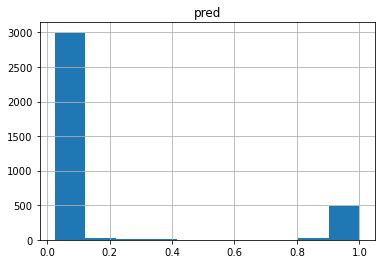

In [19]:
fl_bus.hist('pred')

In [20]:
fl_bus.describe()

,pred,actual
count,3567.000000,3567.000000
mean,0.177535,0.200729
std,0.327620,0.400602
min,0.024914,0.000000
25%,0.030780,0.000000
50%,0.037773,0.000000
75%,0.054693,0.000000
max,0.999630,1.000000


In [53]:
fl_bus[fl_bus['pred']<0.5].describe()

,pred,actual
count,3042.000000,3042.000000
mean,0.089092,0.063774
std,0.037500,0.244390
min,0.068537,0.000000
25%,0.073938,0.000000
50%,0.081329,0.000000
75%,0.092154,0.000000
max,0.492789,1.000000


In [54]:
fl_bus[fl_bus['pred']>=0.5].describe()

,pred,actual
count,525.000000,525.000000
mean,0.883995,0.994286
std,0.100752,0.075448
min,0.520665,0.000000
25%,0.783761,1.000000
50%,0.941232,1.000000
75%,0.960275,1.000000
max,0.996099,1.000000


In [30]:
fl_bus['real_pred'] = (fl_bus['pred'] >=0.7).astype(int)

In [31]:
# compute accuracy
from sklearn.metrics import accuracy_score
a = accuracy_score(list(fl_bus['real_pred']),list(fl_bus['actual']))
print('accuracy = ', a*100)

accuracy =  94.56125595738716


In [25]:
X = california[features].values

In [95]:
# use model to predict california
y_pred = model.predict(X)
#pred = convert_to_binary(y_pred)

In [96]:
new_pred = list()
for i in range(len(y_pred)):
    new_pred.append(y_pred[i][0])

In [97]:
ca['pred'] = new_pred

In [98]:
ca_bus = ca.groupby('norm_id').agg({'pred':'max'})

In [108]:
ca_bus = ca_bus.reset_index()

In [102]:
ca_bus[ca_bus['pred']>=0.5].describe()

,pred
count,9967.000000
mean,0.778449
std,0.174309
min,0.500007
25%,0.580242
50%,0.874864
75%,0.930004
max,0.999619


In [103]:
ca_bus[ca_bus['pred']<0.5].describe()

,pred
count,39871.000000
mean,0.339301
std,0.070999
min,0.185451
25%,0.288172
50%,0.336289
75%,0.388561
max,0.499969


In [110]:
ca_bus.to_pickle('ca_bus.p')

#### Model #3: Logistic Regression

In [6]:
# convert pandas dataframe to numpy array
X = fl[features].values
y = fl[["actual"]].values

In [7]:
# standardize
sc = MinMaxScaler()
X = sc.fit_transform(X)
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())

LogisticRegression()

In [10]:
y_pred = lr.predict(X_test)
# convert predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(y_pred[i])
# convert one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(y_test[i])
    
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('accuracy =', a*100)

accuracy = 99.62227602905568


In [11]:
X = ca[features].values

In [12]:
# use model to predict california
y_pred = lr.predict(X)
# convert predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(y_pred[i])

In [13]:
ca['pred'] = pred

In [77]:
ca['norm_id']

0          30.52796:-99.85290#
1         31.02507:-114.84080#
2         32.54368:-117.04650#
3         32.54368:-117.04650#
4         32.54368:-117.04650#
                  ...         
825001    41.78139:-124.19820#
825002    41.78893:-124.20390#
825003    41.78893:-124.20390#
825004    41.80026:-123.37770#
825005     45.50375:-73.56947#
Name: norm_id, Length: 825006, dtype: object

In [16]:
ca[ca['pred']==0].describe()

,lat,lon,yelp,rubmaps,HT_total_lexicon_score,sex_total_lexicon_score,HT_bi_0_count,HT_bi_1_count,HT_bi_2_count,HT_tri_0_count,...,sex_uni_0_count,sex_uni_1_count,sex_uni_2_count,bi_count,tri_count,sex_bi_score,sex_tri_score,HT_bi_score,HT_tri_score,pred
count,38564.000000,38651.000000,38656.0,38656.0,38656.000000,38656.000000,38656.000000,38656.0,38656.0,38656.000000,...,38656.000000,38656.000000,38656.000000,38656.000000,38656.000000,38656.000000,38656.000000,38656.000000,38656.0,38656.0
mean,35.380194,-119.418012,1.0,0.0,0.069045,0.258537,0.000388,0.0,0.0,0.000026,...,0.193476,0.173117,0.042710,0.000414,0.000026,0.000466,0.000052,0.000026,0.0,0.0
std,2.101298,2.011551,0.0,0.0,0.897412,0.762974,0.019695,0.0,0.0,0.005086,...,0.395028,0.454913,0.301099,0.020341,0.005086,0.024913,0.010172,0.005086,0.0,0.0
min,30.527960,-124.264400,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,33.836400,-121.770000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,34.152170,-118.416200,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,37.660725,-117.871500,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,41.800260,-99.852900,1.0,0.0,22.000000,22.000000,1.000000,0.0,0.0,1.000000,...,1.000000,2.000000,11.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.0,0.0


In [17]:
ca[ca['pred']==1].describe()

,lat,lon,yelp,rubmaps,HT_total_lexicon_score,sex_total_lexicon_score,HT_bi_0_count,HT_bi_1_count,HT_bi_2_count,HT_tri_0_count,...,sex_uni_0_count,sex_uni_1_count,sex_uni_2_count,bi_count,tri_count,sex_bi_score,sex_tri_score,HT_bi_score,HT_tri_score,pred
count,143598.000000,143623.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,...,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.0
mean,35.316874,-119.403774,0.115801,0.884199,0.215769,1.518339,0.005654,0.000049,0.000007,0.000522,...,0.373268,0.461873,0.528233,0.006580,0.000543,0.006231,0.000369,0.001205,0.000014,1.0
std,1.986799,1.985416,0.319987,0.319987,2.939096,2.276002,0.082831,0.009514,0.002639,0.042133,...,0.920543,1.090897,1.017761,0.090287,0.042380,0.110239,0.030199,0.156079,0.005277,0.0
min,32.560430,-124.193500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,33.831570,-121.847520,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,34.130470,-118.366880,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,37.434600,-117.908430,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,41.755870,-114.595000,1.000000,1.000000,330.000000,60.000000,5.000000,3.000000,1.000000,13.000000,...,30.000000,44.000000,30.000000,5.000000,13.000000,6.000000,4.000000,44.000000,2.000000,1.0


#### Model 4: LINEAR regression

In [83]:
# convert pandas dataframe to numpy array
X = fl[features].values
y = fl[["actual"]].values

In [84]:
# standardize
sc = MinMaxScaler()
X = sc.fit_transform(X)
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train.ravel())

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)
# convert predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(y_pred[i])
# convert one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(y_test[i])
    
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('accuracy =', a*100)

accuracy = 99.62227602905568


In [11]:
X = ca[features].values

In [75]:
y_pred = model.predict(X_test)
# convert one hot encoded test label to label
test = list()
new_test = y_test >= 0.5
for i in range(len(new_test)):
    test.append(new_test[i][0])

In [76]:
new_pred = y_pred >= 0.5
new_new_pred = list()
for i in range(len(new_pred)):
    new_new_pred.append(new_pred[i][0])

In [78]:
# use model to predict california
X = ca[features].values
sc = MinMaxScaler()
X = sc.fit_transform(X)

y_pred = model.predict(X)
#Converting predictions to label
pred = list()
new_pred = y_pred >= 0.5
for i in range(len(new_pred)):
    pred.append(new_pred[i][0])

In [13]:
ca['pred'] = pred

In [16]:
ca[ca['pred']==0].describe()

,lat,lon,yelp,rubmaps,HT_total_lexicon_score,sex_total_lexicon_score,HT_bi_0_count,HT_bi_1_count,HT_bi_2_count,HT_tri_0_count,...,sex_uni_0_count,sex_uni_1_count,sex_uni_2_count,bi_count,tri_count,sex_bi_score,sex_tri_score,HT_bi_score,HT_tri_score,pred
count,38564.000000,38651.000000,38656.0,38656.0,38656.000000,38656.000000,38656.000000,38656.0,38656.0,38656.000000,...,38656.000000,38656.000000,38656.000000,38656.000000,38656.000000,38656.000000,38656.000000,38656.000000,38656.0,38656.0
mean,35.380194,-119.418012,1.0,0.0,0.069045,0.258537,0.000388,0.0,0.0,0.000026,...,0.193476,0.173117,0.042710,0.000414,0.000026,0.000466,0.000052,0.000026,0.0,0.0
std,2.101298,2.011551,0.0,0.0,0.897412,0.762974,0.019695,0.0,0.0,0.005086,...,0.395028,0.454913,0.301099,0.020341,0.005086,0.024913,0.010172,0.005086,0.0,0.0
min,30.527960,-124.264400,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,33.836400,-121.770000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,34.152170,-118.416200,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,37.660725,-117.871500,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,41.800260,-99.852900,1.0,0.0,22.000000,22.000000,1.000000,0.0,0.0,1.000000,...,1.000000,2.000000,11.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.0,0.0


In [17]:
ca[ca['pred']==1].describe()

,lat,lon,yelp,rubmaps,HT_total_lexicon_score,sex_total_lexicon_score,HT_bi_0_count,HT_bi_1_count,HT_bi_2_count,HT_tri_0_count,...,sex_uni_0_count,sex_uni_1_count,sex_uni_2_count,bi_count,tri_count,sex_bi_score,sex_tri_score,HT_bi_score,HT_tri_score,pred
count,143598.000000,143623.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,...,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.000000,143626.0
mean,35.316874,-119.403774,0.115801,0.884199,0.215769,1.518339,0.005654,0.000049,0.000007,0.000522,...,0.373268,0.461873,0.528233,0.006580,0.000543,0.006231,0.000369,0.001205,0.000014,1.0
std,1.986799,1.985416,0.319987,0.319987,2.939096,2.276002,0.082831,0.009514,0.002639,0.042133,...,0.920543,1.090897,1.017761,0.090287,0.042380,0.110239,0.030199,0.156079,0.005277,0.0
min,32.560430,-124.193500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,33.831570,-121.847520,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,34.130470,-118.366880,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,37.434600,-117.908430,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,41.755870,-114.595000,1.000000,1.000000,330.000000,60.000000,5.000000,3.000000,1.000000,13.000000,...,30.000000,44.000000,30.000000,5.000000,13.000000,6.000000,4.000000,44.000000,2.000000,1.0
